Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Data Collection & Pre-Processing

In [2]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('/content/mail_data.csv')

In [3]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
# Check for missing values
missing_values = raw_mail_data.isnull().sum()
print(missing_values)

Category    0
Message     0
dtype: int64


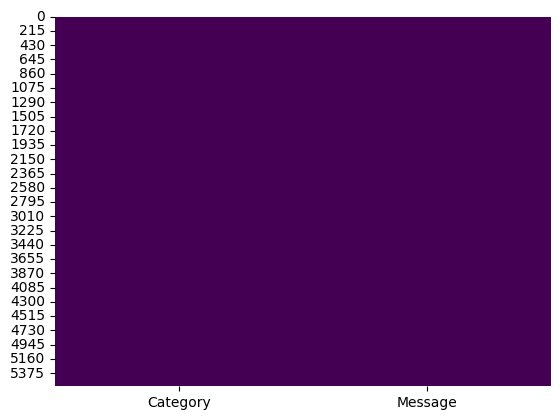

In [5]:
# Visualize missing values
sns.heatmap(raw_mail_data.isnull(), cbar=False, cmap='viridis')
plt.show()

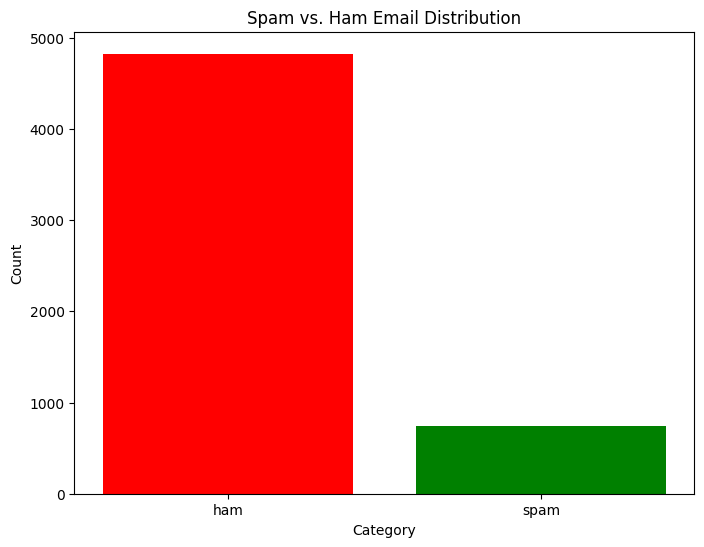

In [6]:
#visualize of spam and ham bar chart
# Assuming 'df' is your DataFrame with 'message' and 'label' columns
# You can create a bar chart to visualize the distribution of spam and ham emails
spam_ham_counts = raw_mail_data['Category'].value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(spam_ham_counts.index, spam_ham_counts.values, color=['red', 'green'])
plt.title('Spam vs. Ham Email Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


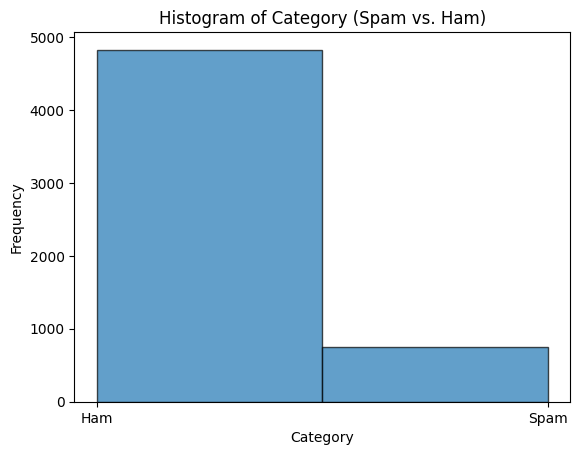

In [7]:
plt.hist(raw_mail_data["Category"], bins=2, edgecolor="k", alpha=0.7)
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.title("Histogram of Category (Spam vs. Ham)")
plt.xticks([0, 1], ["Ham", "Spam"])
plt.show()


In [8]:
# Load the csv file into a pandas DataFrame
data = pd.read_csv("mail_data.csv")

# Count occurrences of "spam" and "ham" in the "Category" column
spam_count = (data["Category"] == "spam").sum()
ham_count = (data["Category"] == "ham").sum()

print("Count of 'spam' instances:", spam_count)
print("Count of 'ham' instances:", ham_count)


Count of 'spam' instances: 747
Count of 'ham' instances: 4825


In [9]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [10]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)